<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/Vision_AIHUB/opencv_faceDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##OpenCV DNN
  - This library provides pretrained models:
    - Object detection models:VGG-SSD, MobileNet-SSD, Faster-RCNN, R-FCN, OpenCV face detector, Mask-RCNN, EAST, YOLOv2, tiny YOLO, YOLOv3
    - Pose estimation models: OpenPose
    - Facial recognition: OpenFace

  - This library can do only inference.

In [1]:
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import modules

In [2]:
import cv2
import cvlib
import numpy as np
from google.colab.patches import cv2_imshow

### Import an image and do face recognition

In [3]:
# Mount Google drive to import kaggle.json
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
img = cv2.imread('/content/drive/MyDrive/DeepLearning/대구AI허브/poster.jpg')
height, width, channels = img.shape
print(img.shape)

(440, 800, 3)


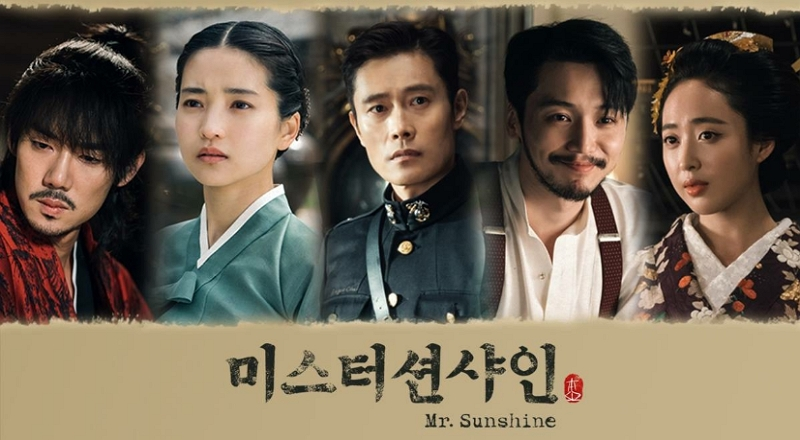

In [5]:
# Check the image
cv2_imshow(img)

In [6]:
faces, confidences = cvlib.detect_face(img)

In [7]:
print('faces', faces)
print('confidences', confidences)

faces [[11, 95, 120, 234], [663, 84, 751, 212], [355, 54, 455, 186], [526, 59, 628, 197], [173, 50, 280, 186]]
confidences [0.9999416, 0.99991965, 0.9999006, 0.9998764, 0.9998293]


In [8]:
faceImage = img.copy()
for i, face in enumerate(faces):
    x1, y1, x2, y2 = face
    cv2.rectangle(faceImage, (x1,y1), (x2,y2), (255, 0, 0 ), 2)
    #cv2.putText(faceImage, str(confidences[i]), (x1,y1), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 2)
    cv2.putText(faceImage, f'{100*confidences[i]:.3f}%', (x1,y1), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 2)

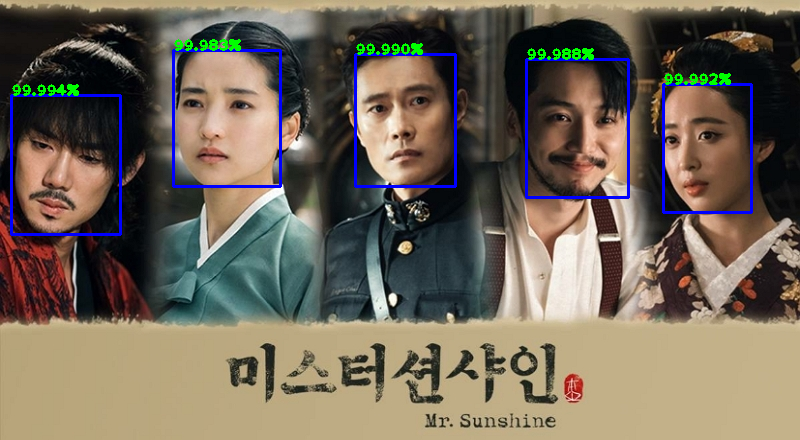

In [9]:
cv2_imshow(faceImage)

### Gender recognition

In [10]:
for i, face in enumerate(faces):
    x1, y1, x2, y2 = face
    roi = img[y1:y2, x1:x2]
    label, confidence = cvlib.detect_gender(roi)
    gender = label[np.argmax(confidence)]    
    cv2.putText(faceImage, f'{gender}: {100*confidence[np.argmax(confidence)]:.3f}%', (x1,y1-15), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255), 2)

[INFO] Initializing gender detection model ..


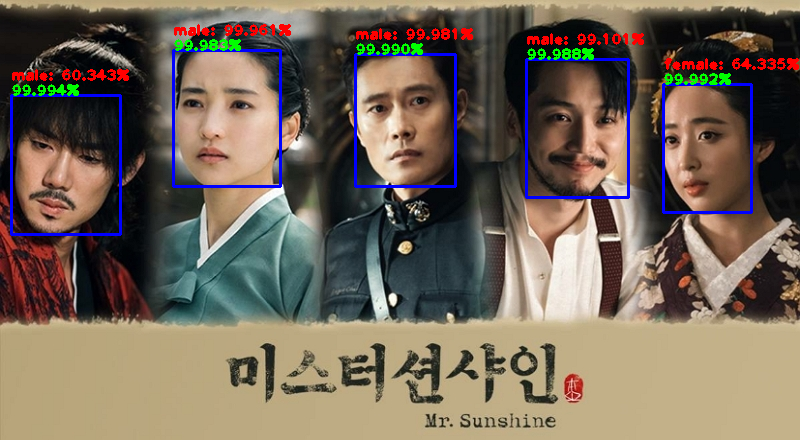

In [11]:
cv2_imshow(faceImage)

### Blur effect: find faces and blur them for security reasons

In [12]:
for i, face in enumerate(faces):
    x1, y1, x2, y2 = face
    roi = img[y1:y2, x1:x2]
    roiBlurred = cv2.GaussianBlur(roi, ksize=(27,27), sigmaX=0)
    faceImage[y1:y2, x1:x2] = roiBlurred

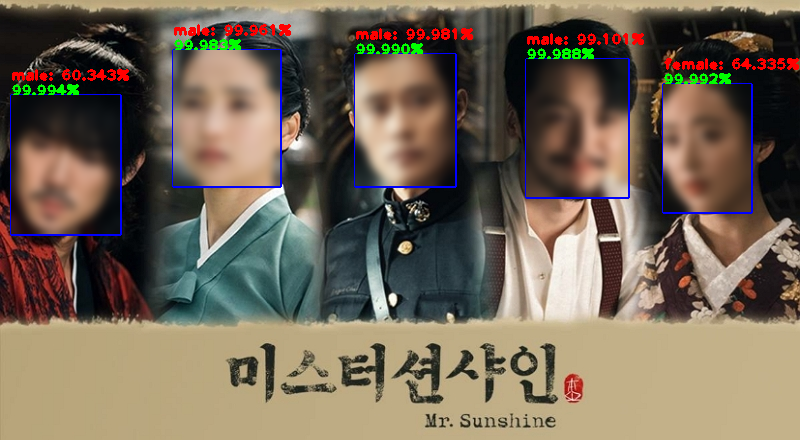

In [13]:
cv2_imshow(faceImage)